# Assignment 4:

In [1]:
import pylab as pl
import pandas as pd
import numpy as np
import os
import scipy.stats
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUIDATA")
import pylab as pl

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
def getCitiBikeCSV(datestring):
    """
    looks for existing files, download a file if none is there, unzips it, moves it
    """
    print ("Downloading", datestring)
    ### First I will heck that it is not already there
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        if os.path.isfile(datestring + "-citibike-tripdata.csv"):
            # if in the current dir just move it
            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):
                print ("Error moving file!, Please check!")
        #otherwise start looking for the zip file
        else:
            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):
                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):
                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")
                ###  To move it I use the os.system() functions to run bash commands with arguments
                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))
            ### unzip the csv 
            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")
            ## NOTE: old csv citibike data had a different name structure. 
            if '2014' in datestring:
                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 
                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")
            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))
    ### One final check:
    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):
        print ("WARNING!!! something is wrong: the file is not there!")

    else:
        print ("file in place, you can continue")

In [3]:
# The significant threshold for the whole exercise is 0.05
alpha = 0.05

# Read in data

In [4]:
# get two months data
datestring1 = '201502'
datestring2 = '201506'
getCitiBikeCSV(datestring1)
getCitiBikeCSV(datestring2)

file in place, you can continue
file in place, you can continue


In [5]:
df1 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring1 + '-citibike-tripdata.csv')
df1.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1


In [6]:
df2 = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring2 + '-citibike-tripdata.csv')
df2.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,1338,6/1/2015 0:00,6/1/2015 0:22,128,MacDougal St & Prince St,40.727103,-74.002971,2021,W 45 St & 8 Ave,40.759291,-73.988597,20721,Subscriber,1984.0,1
1,290,6/1/2015 0:00,6/1/2015 0:05,438,St Marks Pl & 1 Ave,40.727791,-73.985649,312,Allen St & E Houston St,40.722055,-73.989111,21606,Subscriber,1997.0,1
2,634,6/1/2015 0:01,6/1/2015 0:11,383,Greenwich Ave & Charles St,40.735238,-74.000271,388,W 26 St & 10 Ave,40.749718,-74.002950,16595,Subscriber,1993.0,1
3,159,6/1/2015 0:01,6/1/2015 0:04,361,Allen St & Hester St,40.716059,-73.991908,531,Forsyth St & Broome St,40.718939,-73.992663,16949,Subscriber,1981.0,1
4,1233,6/1/2015 0:02,6/1/2015 0:22,382,University Pl & E 14 St,40.734927,-73.992005,532,S 5 Pl & S 4 St,40.710451,-73.960876,17028,Customer,NaN,0


In [7]:
df1.shape, df2.shape

((196930, 15), (941219, 15))

In [8]:
df = pd.concat((df1, df2), axis=0)
df.shape

(1138149, 15)

In [9]:
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00


In [10]:
df.columns

Index(['tripduration', 'starttime', 'stoptime', 'start station id',
       'start station name', 'start station latitude',
       'start station longitude', 'end station id', 'end station name',
       'end station latitude', 'end station longitude', 'bikeid', 'usertype',
       'birth year', 'gender', 'date'],
      dtype='object')

# Task 1: trip duration of bikers that ride during the day vs night

**H0: there is no statistical difference in the trip duration distribution of day and night riders**
$$ \alpha = 0.05 $$

In [11]:
df['hour'] = df['date'].dt.hour
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00,0
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00,0
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00,0
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00,0
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00,0


In [60]:
#df is the dataframe where the content of the csv file is stored
#day: 6am - 18pm; night: 18pm - 6am
def day(a, b):
    if (b > 5) & (b < 19):
        return a
    else:
        return NaN

df['tripD'] = df.apply(lambda x: day(x.tripduration, x.hour), axis=1)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,tripD
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00,0,NaN
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00,0,NaN
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00,0,NaN
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00,0,NaN
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00,0,NaN


In [65]:
def night(a, b):
    if (b < 6) | (b > 18):
        return a
    else:
        return NaN

df['tripN'] = df.apply(lambda x: night(x.tripduration, x.hour), axis=1)
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour,tripD,tripN
0,801,2/1/2015 0:00,2/1/2015 0:14,521,8 Ave & W 31 St,40.750450,-73.994811,423,W 54 St & 9 Ave,40.765849,-73.986905,17131,Subscriber,1978.0,2,2015-02-01 00:00:00,0,NaN,801.0
1,379,2/1/2015 0:00,2/1/2015 0:07,497,E 17 St & Broadway,40.737050,-73.990093,504,1 Ave & E 15 St,40.732219,-73.981656,21289,Subscriber,1993.0,1,2015-02-01 00:00:00,0,NaN,379.0
2,2474,2/1/2015 0:01,2/1/2015 0:42,281,Grand Army Plaza & Central Park S,40.764397,-73.973715,127,Barrow St & Hudson St,40.731724,-74.006744,18903,Subscriber,1969.0,2,2015-02-01 00:01:00,0,NaN,2474.0
3,818,2/1/2015 0:01,2/1/2015 0:15,2004,6 Ave & Broome St,40.724399,-74.004704,505,6 Ave & W 33 St,40.749013,-73.988484,21044,Subscriber,1985.0,2,2015-02-01 00:01:00,0,NaN,818.0
4,544,2/1/2015 0:01,2/1/2015 0:10,323,Lawrence St & Willoughby St,40.692362,-73.986317,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19868,Subscriber,1957.0,1,2015-02-01 00:01:00,0,NaN,544.0


In [66]:
#dropping some data I no longer need
df.drop(df[['starttime', 'stoptime', 'start station id', 'start station name', 
            'end station id', 'end station name', 'bikeid', 'usertype', 'gender', 'date']], axis=1, inplace=True)
df.head()

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,birth year,hour,tripD,tripN
0,801,40.750450,-73.994811,40.765849,-73.986905,1978.0,0,NaN,801.0
1,379,40.737050,-73.990093,40.732219,-73.981656,1993.0,0,NaN,379.0
2,2474,40.764397,-73.973715,40.731724,-74.006744,1969.0,0,NaN,2474.0
3,818,40.724399,-74.004704,40.749013,-73.988484,1985.0,0,NaN,818.0
4,544,40.692362,-73.986317,40.683826,-73.976323,1957.0,0,NaN,544.0


In [67]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,birth year,hour,tripD,tripN
count,1.138149e+06,1.138149e+06,1.138149e+06,1.138149e+06,1.138149e+06,1.005490e+06,1.138149e+06,8.929580e+05,245191.000000
mean,8.604430e+02,4.073493e+01,-7.399110e+01,4.073461e+01,-7.399126e+01,1.976069e+03,1.396376e+01,8.627090e+02,852.190488
std,3.156855e+03,1.923219e-02,1.227850e-02,1.919183e-02,1.228156e-02,1.152418e+01,4.931966e+00,3.288684e+03,2621.287002
min,6.000000e+01,4.068034e+01,-7.401713e+01,4.068034e+01,-7.401713e+01,1.885000e+03,0.000000e+00,6.000000e+01,60.000000
25%,3.870000e+02,4.072182e+01,-7.400004e+01,4.072165e+01,-7.400027e+01,NaN,1.000000e+01,NaN,NaN
50%,6.150000e+02,4.073650e+01,-7.399076e+01,4.073649e+01,-7.399093e+01,NaN,1.500000e+01,NaN,NaN
75%,1.008000e+03,4.075020e+01,-7.398195e+01,4.074972e+01,-7.398205e+01,NaN,1.800000e+01,NaN,NaN
max,1.691873e+06,4.077152e+01,-7.395005e+01,4.077152e+01,-7.395005e+01,1.999000e+03,2.300000e+01,1.691873e+06,510246.000000


In [68]:
# dropping NaN values
df['tripD'].dropna(inplace= True)
df['tripN'].dropna(inplace= True)
df.head()

,tripduration,start station latitude,start station longitude,end station latitude,end station longitude,birth year,hour,tripD,tripN
0,801,40.750450,-73.994811,40.765849,-73.986905,1978.0,0,NaN,801.0
1,379,40.737050,-73.990093,40.732219,-73.981656,1993.0,0,NaN,379.0
2,2474,40.764397,-73.973715,40.731724,-74.006744,1969.0,0,NaN,2474.0
3,818,40.724399,-74.004704,40.749013,-73.988484,1985.0,0,NaN,818.0
4,544,40.692362,-73.986317,40.683826,-73.976323,1957.0,0,NaN,544.0


### I split trip duration in 60 second bins and show all data within an hour.

Text(0.5,1,'night riders')

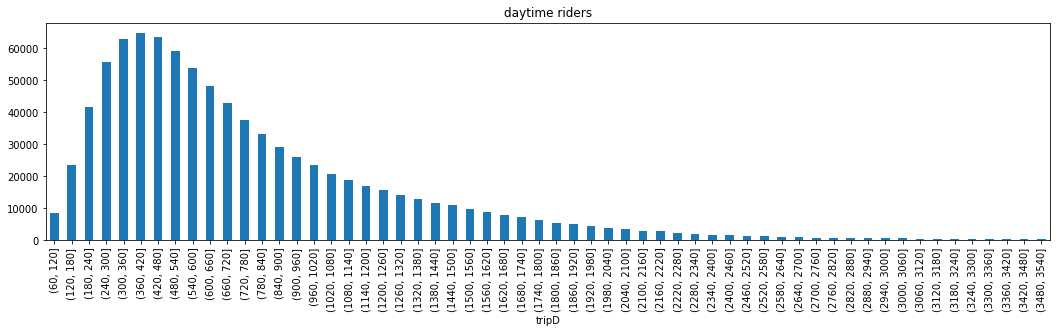

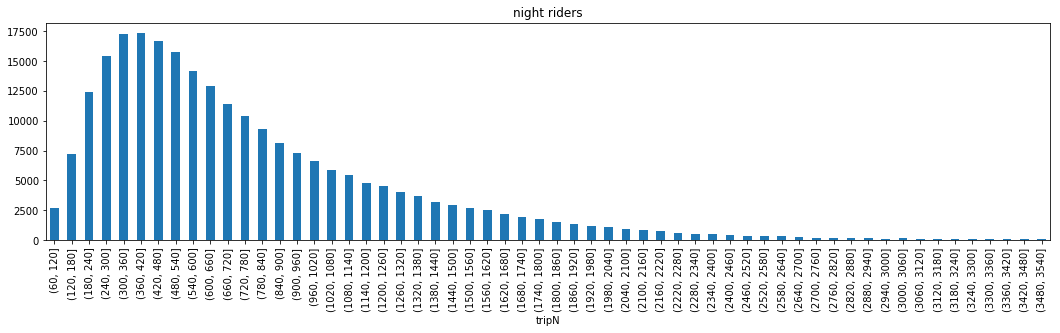

In [69]:
# plotting histograms with pandas is a bit different than with pylab
# this is a VERY USEFUL syntax for you to knonw!
bins = np.arange(60, 3600, 60)
axD = df.tripD.groupby(pd.cut(df.tripD, bins)).agg([count_nonzero]).plot(kind='bar', legend=False, figsize=(18, 4))
axD.set_title("daytime riders")
axN = df.tripN.groupby(pd.cut(df.tripN, bins)).agg([count_nonzero]).plot(kind='bar', legend=False, figsize=(18, 4))
axN.set_title("night riders")

**Figure 1: histogrammed distribution of riders' trip duration by day/night, which shows most of people use citibikes ranging from 1 min to 30 mins.**

            count_nonzero
tripD                    
(60, 120]        0.001378
(120, 180]       0.004315
(180, 240]       0.007911
(240, 300]       0.008090
(300, 360]       0.007582


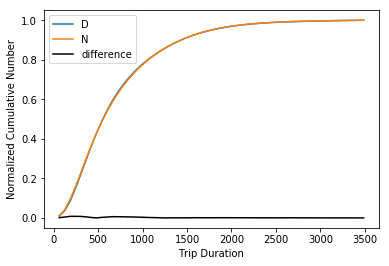

In [70]:
csD=df.tripD.groupby(pd.cut(df.tripD, bins)).agg([count_nonzero]).cumsum()
csN=df.tripN.groupby(pd.cut(df.tripN, bins)).agg([count_nonzero]).cumsum()

# normalize and calculation differences over bins
print (np.abs(csD / csD.max() - csN / csN.max()).head())

pl.plot(bins[:-1] + 5, csD / csD.max(), label = "D")
pl.plot(bins[:-1] + 5, csN / csN.max(), label = "N")
pl.plot(bins[:-1] + 5, np.sqrt(np.abs(csD / csD.max() - csN / csN.max()))**2, 'k-', label = "difference")
pl.xlabel("Trip Duration")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

** Figure 2: the cumulative distribution of CitiBike riders' trip duration by day/night, which shows the difference is very small **

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

In [71]:
# Notice that there may be NaN values you are gonna have to deal with! 
# You can do that for example with a Boolean statementsuch as 
# df.ageF[~np.isnan(df.ageF)] or you can use numpy functions that deal with Nan values: nansum, nanmean, nanstd...
ks = scipy.stats.ks_2samp(df.tripD[~np.isnan(df.tripD)], df.tripN[~np.isnan(df.tripN)])
print(ks)

Ks_2sampResult(statistic=0.0090411365105288188, pvalue=4.3175253615340045e-14)


### The returns are significance and Pvalue. The pvalue is smaller than significant value 0.05, which shows that we can reject the null hypothesis that 2 independent samples are drawn from the same continuous distribution

How you would obtain the same result by hand:
- Remember: the Null hypothesis is rejected if $D_KS(n1,n2) > c(\alpha) \sqrt{\frac{(n1 + n2)}{n1n2}}$
- (see class notes) where $c(\alpha$) is the inverse of the KS distribution, and you do not have to know how to get that cause there are tables that list critical values!! http://www.real-statistics.com/tests-normality-and-symmetry/statistical-tests-normality-symmetry/kolmogorov-smirnov-test/kolmogorov-distribution/
- But also this result depends in your choice of binning through, and thus the resultyou get by hand may not be exactly the same as the one the KS returns. Either way: this is how you would calculate the KS statistics by hand.

In [72]:
## redo the test with a 200 times smaller reducted dataset
ks_200 = scipy.stats.ks_2samp(df.tripD[~np.isnan(df.tripD)][::200], df.tripN[~np.isnan(df.tripN)][::200])
print(ks_200)

Ks_2sampResult(statistic=0.032442104532442839, pvalue=0.25925038203145023)


### The returns are KS significance and Pvalue. The pvalue 0.259 is greater than significant value 0.05, although the significance increases, which shows that we cannot reject the null hypothesis that 2 reducted samples are drawn from the same continuous distribution.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



In [73]:
length = max(len(df.tripD), len(df.tripN))

def padding(array):
    if len(array) == length:
        return array
    else:
        return np.pad(array, (0, length - len(array)), 'mean')
    
pr = scipy.stats.pearsonr(np.sort(padding(df.tripD)), np.sort(padding(df.tripN)))
print(pr)

(0.95603059705905258, 0.0)


### The returns are Pearson’s correlation coefficient and 2-tailed Pvalue. The pvalue is smaller than significant value 0.05, which shows that we can reject the null hypothesis that 2 sets of data are uncorrelated

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [74]:
sp = scipy.stats.spearmanr(np.sort(padding(df.tripD)), np.sort(padding(df.tripN)))
print(sp)

SpearmanrResult(correlation=0.78629659725154266, pvalue=0.0)


### The returns are Spearman’s correlation coefficient and 2-tailed Pvalue. The pvalue is smaller than significant value 0.05, which shows that we can reject the null hypothesis that 2 sets of data are uncorrelated

### ===========================================================================================

# Task 2: age of bikers for trips originating in Manhattan/Brooklyn

**H0: there is no statistical difference in the age of bikers originating in Manhattan and in Brooklyn**
$$ \alpha = 0.05 $$

In [75]:
# From Prof. Finco
# defines a function that to place statin in BL or M based on 2 points

x1 = (40.738102, -73.962194)
x0 = (40.694456, -74.012116)

def manORbk(coords):
    ''' defined points in BK or Manhattan based on position w respect to a single boundary line
    Arguments:
    coords: (lat, lon) tuple or 1D array of size 2, coordinates in degrees
    returns: character "M" or "B" for Manhattan and Brooklyn respectively
    '''
    lat,lon = coords
    #print (lat, lon)
    if lat >= x1[0] :
        #print (1)
        return 'M'
    elif lat <= x0[0] :
        #print (2)
        return 'B'
    elif lon > 1.143793 * lat -120.558150:
        #print (3, 1.143793 * lat -120.558150)
        return 'B'
    else: 
        #print (4, 1.143793 * lat -120.558150, lon > 1.143793 * lat -120.558150)
        return 'M'

In [76]:
df.drop(df[['end station latitude', 'end station longitude', 'hour', 'tripD', 'tripN', 'tripduration']], 
        axis=1, inplace=True)
df.head()

,start station latitude,start station longitude,birth year
0,40.750450,-73.994811,1978.0
1,40.737050,-73.990093,1993.0
2,40.764397,-73.973715,1969.0
3,40.724399,-74.004704,1985.0
4,40.692362,-73.986317,1957.0


In [78]:
df['block'] = df.apply(lambda x: manORbk((x['start station latitude'], x['start station longitude'])), axis=1)
df.head()

,start station latitude,start station longitude,birth year,block
0,40.750450,-73.994811,1978.0,M
1,40.737050,-73.990093,1993.0,M
2,40.764397,-73.973715,1969.0,M
3,40.724399,-74.004704,1985.0,M
4,40.692362,-73.986317,1957.0,B


In [80]:
def MN(a, b):
    if b == 'M':
        return 2015 - a
    else:
        return NaN

df['ageM'] = df.apply(lambda x: MN(x['birth year'], x.block), axis=1)
df.head()

,start station latitude,start station longitude,birth year,block,ageM
0,40.750450,-73.994811,1978.0,M,37.0
1,40.737050,-73.990093,1993.0,M,22.0
2,40.764397,-73.973715,1969.0,M,46.0
3,40.724399,-74.004704,1985.0,M,30.0
4,40.692362,-73.986317,1957.0,B,NaN


In [81]:
def BK(a, b):
    if b == 'B':
        return 2015 - a
    else:
        return NaN

df['ageB'] = df.apply(lambda x: BK(x['birth year'], x.block), axis=1)
df.head()

,start station latitude,start station longitude,birth year,block,ageM,ageB
0,40.750450,-73.994811,1978.0,M,37.0,NaN
1,40.737050,-73.990093,1993.0,M,22.0,NaN
2,40.764397,-73.973715,1969.0,M,46.0,NaN
3,40.724399,-74.004704,1985.0,M,30.0,NaN
4,40.692362,-73.986317,1957.0,B,NaN,58.0


In [82]:
df.describe()

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/numpy/lib/function_base.py:3403: RuntimeWarning: Invalid value encountered in median
  RuntimeWarning)


,start station latitude,start station longitude,birth year,ageM,ageB
count,1.138149e+06,1.138149e+06,1.005490e+06,915856.000000,89634.000000
mean,4.073493e+01,-7.399110e+01,1.976069e+03,39.003430,38.191970
std,1.923219e-02,1.227850e-02,1.152418e+01,11.587188,10.831833
min,4.068034e+01,-7.401713e+01,1.885000e+03,16.000000,16.000000
25%,4.072182e+01,-7.400004e+01,NaN,NaN,NaN
50%,4.073650e+01,-7.399076e+01,NaN,NaN,NaN
75%,4.075020e+01,-7.398195e+01,NaN,NaN,NaN
max,4.077152e+01,-7.395005e+01,1.999000e+03,130.000000,130.000000


In [83]:
df['ageM'].dropna(inplace=True)
df['ageB'].dropna(inplace=True)

### I split age in 10 year bins and show all data from 10~99.

Text(0.5,1,'B riders')

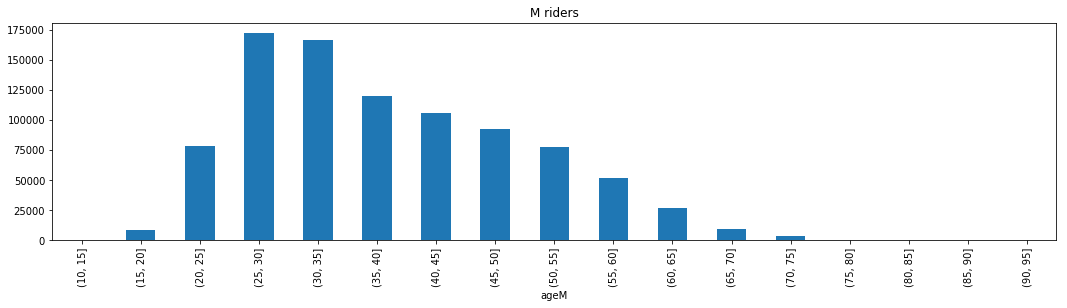

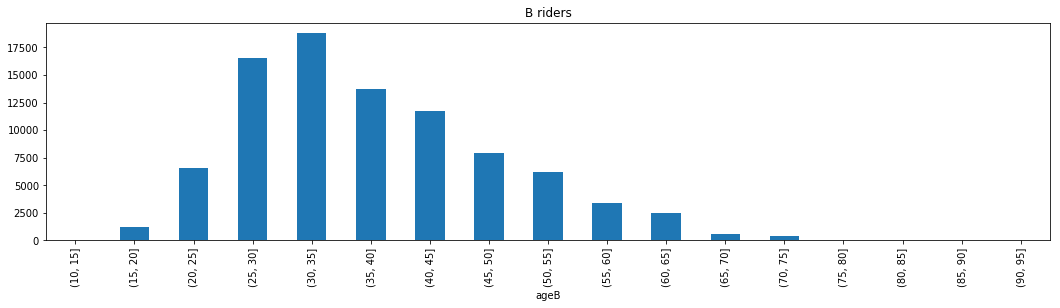

In [84]:
bins = np.arange(10, 99, 5)
axM = df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).plot(kind='bar', legend=False, figsize=(18, 4))
axM.set_title("M riders")
axB = df.ageB.groupby(pd.cut(df.ageB, bins)).agg([count_nonzero]).plot(kind='bar', legend=False, figsize=(18, 4))
axB.set_title("B riders")

** Figure 3: histogrammed distribution of riders' age in Manhattan/Brooklyn **

          count_nonzero
ageM                   
(10, 15]       0.000000
(15, 20]       0.003765
(20, 25]       0.008421
(25, 30]       0.011968
(30, 35]       0.015140


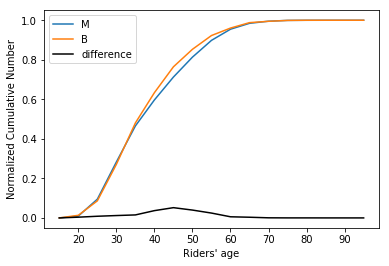

In [85]:
csM=df.ageM.groupby(pd.cut(df.ageM, bins)).agg([count_nonzero]).cumsum()
csB=df.ageB.groupby(pd.cut(df.ageB, bins)).agg([count_nonzero]).cumsum()

# normalize and calculation differences over bins
print (np.abs(csM / csM.max() - csB / csB.max()).head())

pl.plot(bins[:-1] + 5, csM / csM.max(), label = "M")
pl.plot(bins[:-1] + 5, csB / csB.max(), label = "B")
pl.plot(bins[:-1] + 5, np.sqrt(np.abs(csM / csM.max() - csB / csB.max()))**2, 'k-', label = "difference")
pl.xlabel("Riders' age")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

**Figure 4: the cumulative distribution of CitiBike riders' age by Manhattan/Brooklyn, which shows the biggest difference occurs around 45**

# KS tests to compare 2 samples

In [86]:
ks = scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)], df.ageB[~np.isnan(df.ageB)])
print(ks)

Ks_2sampResult(statistic=0.053411554352350787, pvalue=6.6890630762702803e-203)


### The returns are significance and Pvalue. The pvalue is smaller than significant value 0.05, which shows that we can reject the null hypothesis that 2 independent samples are drawn from the same continuous distribution

In [87]:
ks_200 = scipy.stats.ks_2samp(df.ageM[~np.isnan(df.ageM)][::200], df.ageB[~np.isnan(df.ageB)][::200])
print(ks_200)

Ks_2sampResult(statistic=0.095314673072621314, pvalue=0.0010817649087444413)


### The returns are KS significance and Pvalue. The pvalue is samller than significant value 0.05, which shows that we can reject the null hypothesis that 2 reducted samples are drawn from the same continuous distribution.

# Pearson's  test for correlation

In [88]:
length = max(len(df.ageM), len(df.ageB))

def padding(array):
    if len(array) == length:
        return array
    else:
        return np.pad(array, (0, length - len(array)), 'mean')
    
pr = scipy.stats.pearsonr(np.sort(padding(df.ageM)), np.sort(padding(df.ageB)))
print(pr)

(0.53156670667943429, 0.0)


### The returns are Pearson’s correlation coefficient and 2-tailed Pvalue. The pvalue is smaller than significant value 0.05, which shows that we can reject the null hypothesis that 2 sets of data are uncorrelated

# Spearman's  test for correlation

In [89]:
sp = scipy.stats.spearmanr(np.sort(padding(df.ageM)), np.sort(padding(df.ageB)))
print(sp)

SpearmanrResult(correlation=0.51516393700279217, pvalue=0.0)


### The returns are Spearman’s correlation coefficient and 2-tailed Pvalue. The pvalue is smaller than significant value 0.05, which shows that we can reject the null hypothesis that 2 sets of data are uncorrelated